In [94]:
import warnings, os
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns
from aggmap import AggMap, AggModel, loadmap

from aggmap import show

np.random.seed(666) #just for reaptable results

from matplotlib.font_manager import FontProperties
from matplotlib.ticker import FormatStrFormatter

font = FontProperties()
font.set_style('italic')
font.set_size(20)

sns.set(style = 'white', font_scale=1.8)


In [95]:
def filter_df_by_zone(df,zone):
    x,y = zone
    x1, x2 = x
    y1, y2 = y
    dfx = df[(df.grid_x >= x1) & (df.grid_x <= x2)]
    new_df = dfx[(dfx.grid_y >= y1) & (dfx.grid_y <= y2)]
    return new_df

In [96]:
color = sns.color_palette("rainbow_r",15).as_hex() #PiYG
color = [color[7], color[5], color[3], color[1] ]

In [97]:
mp = pd.read_excel('./results/MP_importance.xlsx')
s0 = pd.read_excel('./results/Stage_0_importance.xlsx')
s12 = pd.read_excel('./results/Stage_I_II_importance.xlsx')
s34 = pd.read_excel('./results/Stage_III_IV_importance.xlsx')

In [98]:
df = mp[['feature_points', 'grid_x', 'grid_y', 'scatter_x', 'scatter_y', 'Subtypes', 'colors', 'MP_avg_imp']]
df = df.join(s0[s0.columns[-1]]).join(s12[s12.columns[-1]]).join(s34[s34.columns[-1]])

In [99]:
stages = ['MP_avg_imp', 'Stage_0_avg_imp', 'Stage_I_II_avg_imp','Stage_III_IV_avg_imp']
stage_names = ['MP', 'Stage 0', 'Stage I/II','Stage III/IV']

In [105]:
zoneA = [(0,19), (0,15)]
zoneB = [(19,65), (0,15)]
zoneC = [(65,85), (0,15)]
zoneD = [(5,20), (15,65)]
zoneE = [(0,20), (65,85)]

zones = [zoneA, zoneB, zoneC, zoneD, zoneE]
zone_names =  ['zoneA', 'zoneB', 'zoneC', 'zoneD', 'zoneE']

topn = 5

zoneA
zoneB
zoneC
zoneD
zoneE


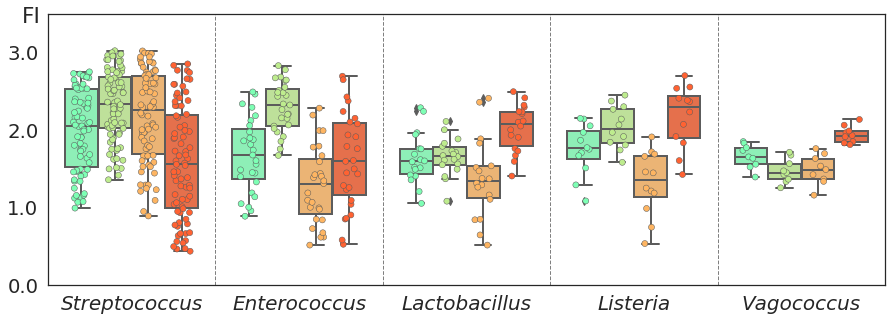

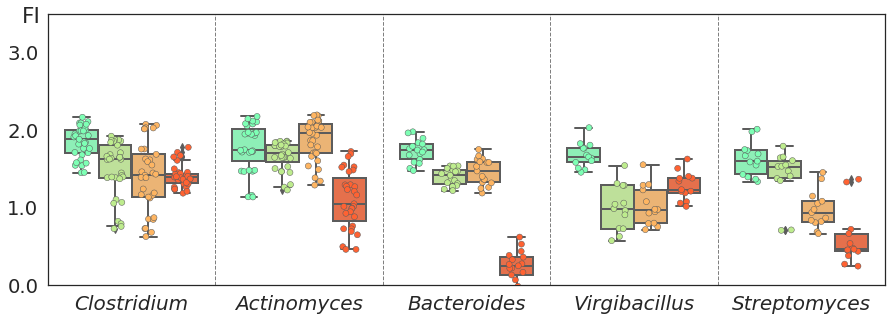

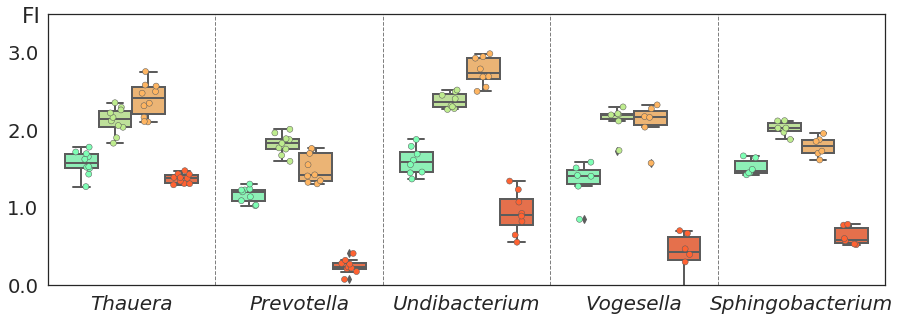

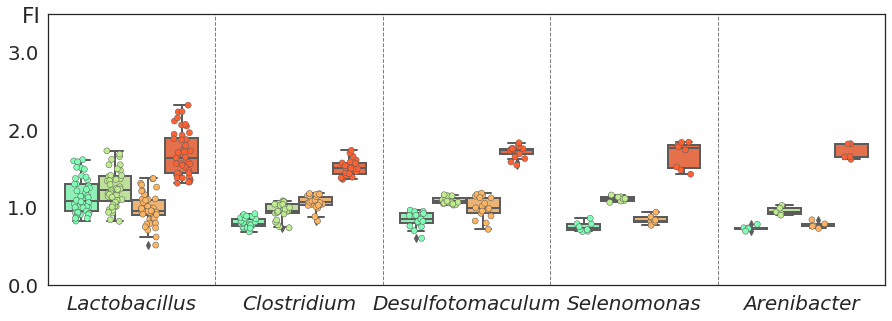

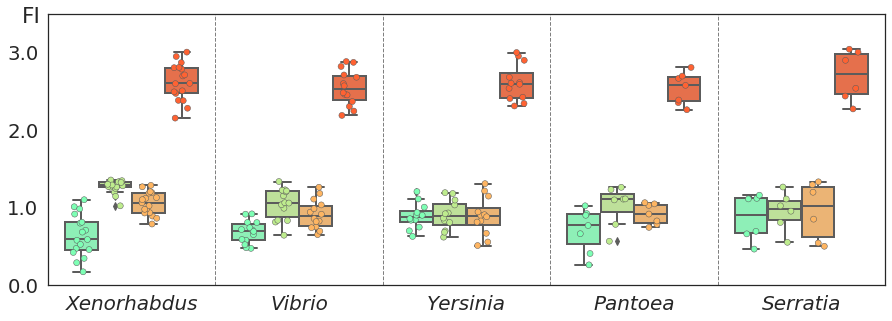

In [135]:
for zone, zone_name in zip(zones, zone_names):

    print(zone_name)
    dfnew = filter_df_by_zone(df, zone)
    dfnew['avg'] = dfnew[stages].mean(axis=1)
    dfnew = dfnew[dfnew['avg'] > 1.0]

    dfnew['species'] = dfnew.feature_points.apply(lambda x:x.split(' ')[0])
    m1 = dfnew.groupby('species').size().sort_values().iloc[-topn:].index.tolist()
    m2 = dfnew.groupby('species').size().sort_values().iloc[:-topn].index.tolist()
    s1 = dict(zip(m1, m1))
    s2 = dict(zip(m2, ['Others']*len(m2)))
    s1.update(s2)
    dfnew['group'] = dfnew.species.map(s1)

    dfnew = dfnew[dfnew['group'] != 'Others']
    order = dfnew.groupby('group').size().sort_values(ascending = False).index.tolist()

    res = []
    for stage,name in zip(stages,stage_names):
        df1 = dfnew[[stage, 'species', 'group']]
        df1['stage'] = name
        df1 = df1.rename(columns={stage:'FI'})
        res.append(df1)

    dfp = pd.concat(res,axis=0)
    #dfp = dfp[dfp.group != 'Others']

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5))

    params = dict(data=dfp,
                  x='group',
                  y='FI',
                  hue='stage',
                  #jitter=0.25,
                  order=order,
                  dodge=True)
    # sns.violinplot(x="group", y="importance score", data=dfp,   hue = 'stage', inner=None,  order = order, color=".8", ax=ax)

    p = sns.stripplot(x="group", y="FI", hue = 'stage', order = order,
                      data=dfp, jitter=0.2, ax= ax , dodge=True, alpha=1,
                      size=6, linewidth = 0.5, palette=color)

    p_box = sns.boxplot(linewidth=2,**params, ax=ax, palette = color) #['#BBBBBB','#DDDDDD']

    handles,labels = p.get_legend_handles_labels()
    ax.legend().set_visible(False)
    ax.set_xlabel('')
    ax.set_ylabel('FI', rotation = 0)
    ax.yaxis.set_label_coords(-0.02,0.95)

    ax.set_ylim(0.0, 3.5)
    
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

    ax.set_xticklabels(labels = order, rotation=0, fontproperties=font)
    #ax.spines['right'].set_visible(False)
    #ax.spines['top'].set_visible(False)
    
    
    for i in [0.5, 1.5, 2.5, 3.5, 4.5]:
        ax.axvline(x=i, lw = 1, ls = '--', color = 'grey')

    fig.savefig('./results/%s.png' % zone_name, bbox_inches='tight', dpi=400) 

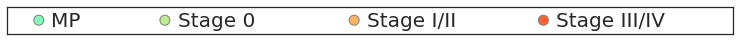

In [137]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13,0.5))

x = [0,2,5,8]
y = [0]*len(x)

s = [100 for n in range(len(x))]
ax.scatter(x,y,s=s, c= color, edgecolors='0.5')
for i, j , v in zip(x, y, stage_names):
    ax.text(i + 0.2, j-0.09,  v, fontsize= 20)
    
ax.set_xlim(-0.5,11)
#ax.axis('off')
ax.set_xticks([])
ax.set_yticks([])
#ax.set_facecolor('#f2f2f2')

fig.savefig('./results/zone_legend.png', bbox_inches='tight', dpi=400) 

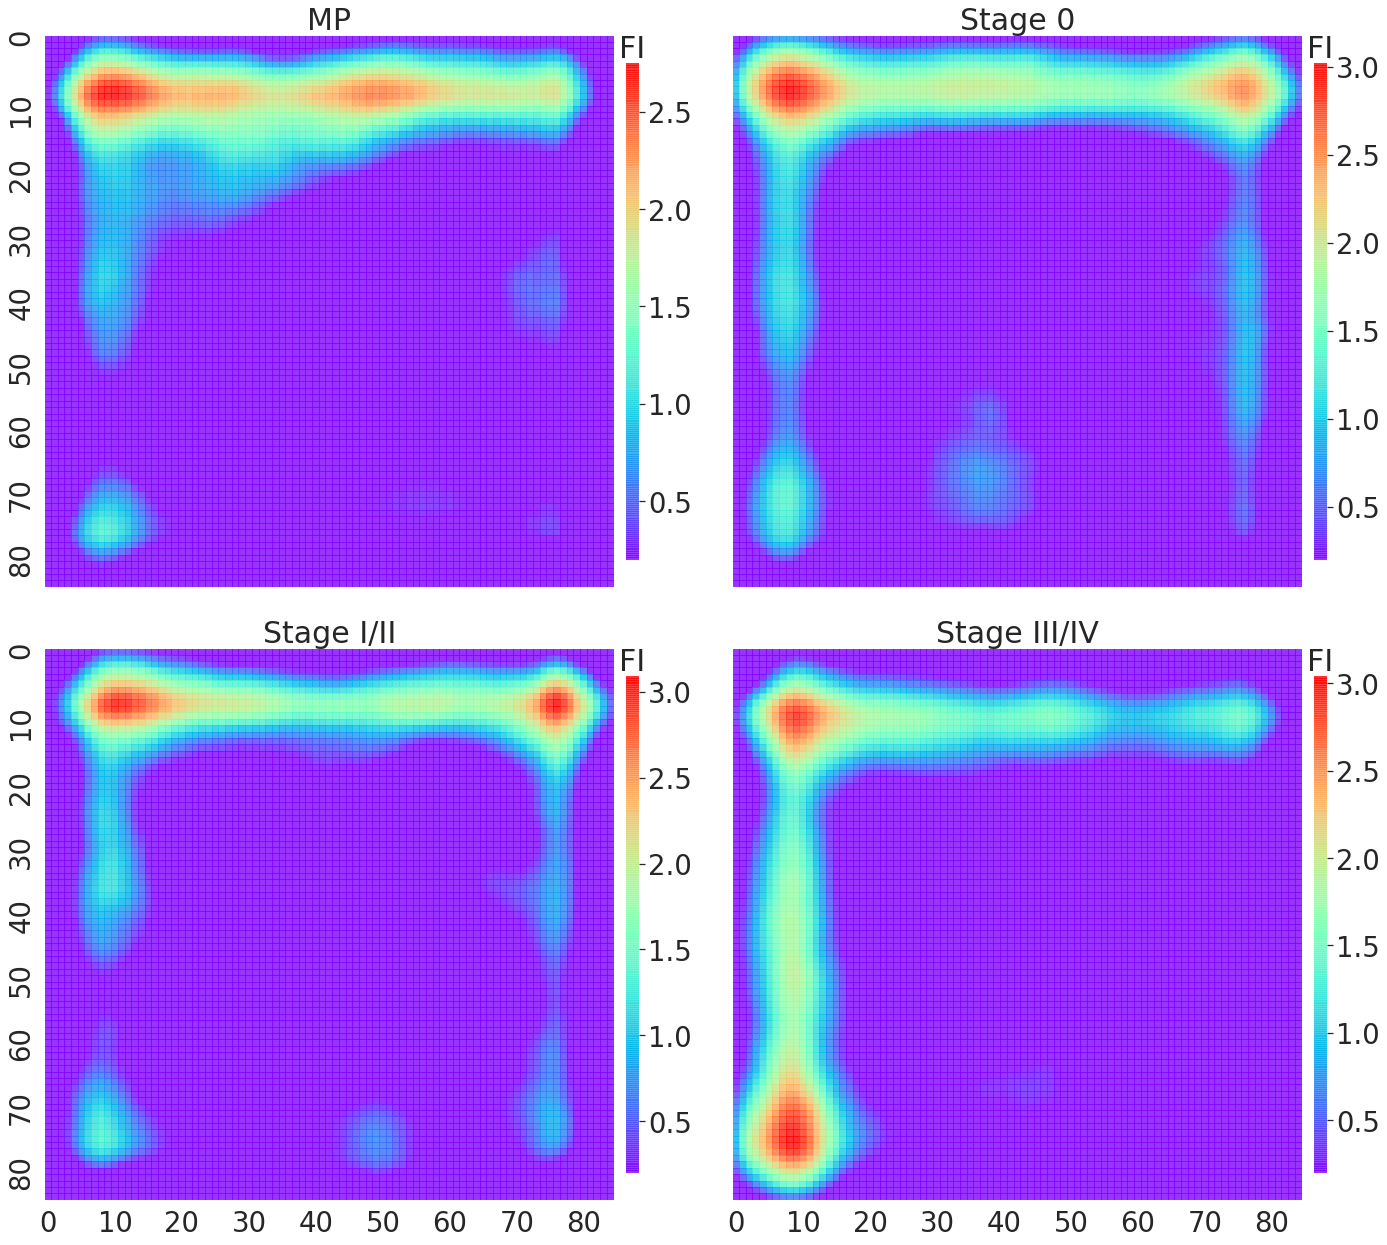

In [92]:
df = df.rename(columns = {'MP_avg_imp':'MP', 'Stage_0_avg_imp':'Stage 0',
                     'Stage_I_II_avg_imp':'Stage I/II', 'Stage_III_IV_avg_imp':'Stage III/IV'})
mpo = loadmap('./CRC_stage.mp')

sns.set(style='white',  font='sans-serif', font_scale=2.5)
fig, axes  = plt.subplots(2, 2, figsize=(20, 18), sharex=True, sharey=True)


for s, ax in zip(df.columns[-4:], axes.ravel()):

    IMPM = df[s] .values.reshape(*mpo.fmap_shape)

    cf = sns.heatmap(IMPM,  
                cmap = 'rainbow', alpha = 0.8, xticklabels=10, ax =ax,
                yticklabels=10, vmin = 0.2,
                cbar_kws = {'fraction':0.046, 'shrink':0.9, 'aspect': 40, 'pad':0.02, }) #  'orientation':'horizontal'
    ax.set_title(s)
    
    cbar = ax.collections[0].colorbar
    cbar.ax.set_title('FI')

fig.tight_layout()
fig.savefig('./results/fmap_imp_4.png', bbox_inches='tight', dpi=400) 

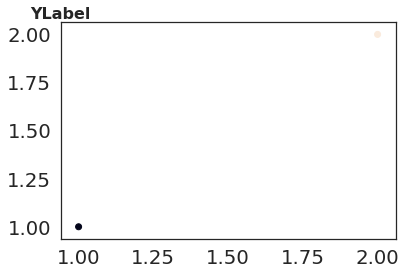

In [130]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

sc = ax.scatter([1, 2], [1, 2], c=[1, 2])
ax.set_ylabel('YLabel', fontweight ='bold', fontsize=16, rotation = 0)
ax.yaxis.set_label_coords(0,1)

plt.show()

ValueError: Position accepts only 'left' or 'right'